Epoch 1/30
361/361 - 11s - loss: 0.0440 - val_loss: 0.0039 - 11s/epoch - 31ms/step
Epoch 2/30
361/361 - 3s - loss: 0.0062 - val_loss: 0.0020 - 3s/epoch - 9ms/step
Epoch 3/30
361/361 - 4s - loss: 0.0051 - val_loss: 0.0047 - 4s/epoch - 11ms/step
Epoch 4/30
361/361 - 4s - loss: 0.0049 - val_loss: 0.0014 - 4s/epoch - 10ms/step
Epoch 5/30
361/361 - 4s - loss: 0.0043 - val_loss: 7.7734e-04 - 4s/epoch - 11ms/step
Epoch 6/30
361/361 - 4s - loss: 0.0038 - val_loss: 5.0046e-04 - 4s/epoch - 11ms/step
Epoch 7/30
361/361 - 5s - loss: 0.0032 - val_loss: 6.9244e-04 - 5s/epoch - 14ms/step
Epoch 8/30
361/361 - 4s - loss: 0.0030 - val_loss: 4.4455e-04 - 4s/epoch - 12ms/step
Epoch 9/30
361/361 - 4s - loss: 0.0033 - val_loss: 6.2921e-04 - 4s/epoch - 11ms/step
Epoch 10/30
361/361 - 4s - loss: 0.0030 - val_loss: 0.0013 - 4s/epoch - 10ms/step
Epoch 11/30
361/361 - 4s - loss: 0.0032 - val_loss: 0.0018 - 4s/epoch - 10ms/step
Epoch 12/30
361/361 - 4s - loss: 0.0027 - val_loss: 9.9586e-04 - 4s/epoch - 11ms/step


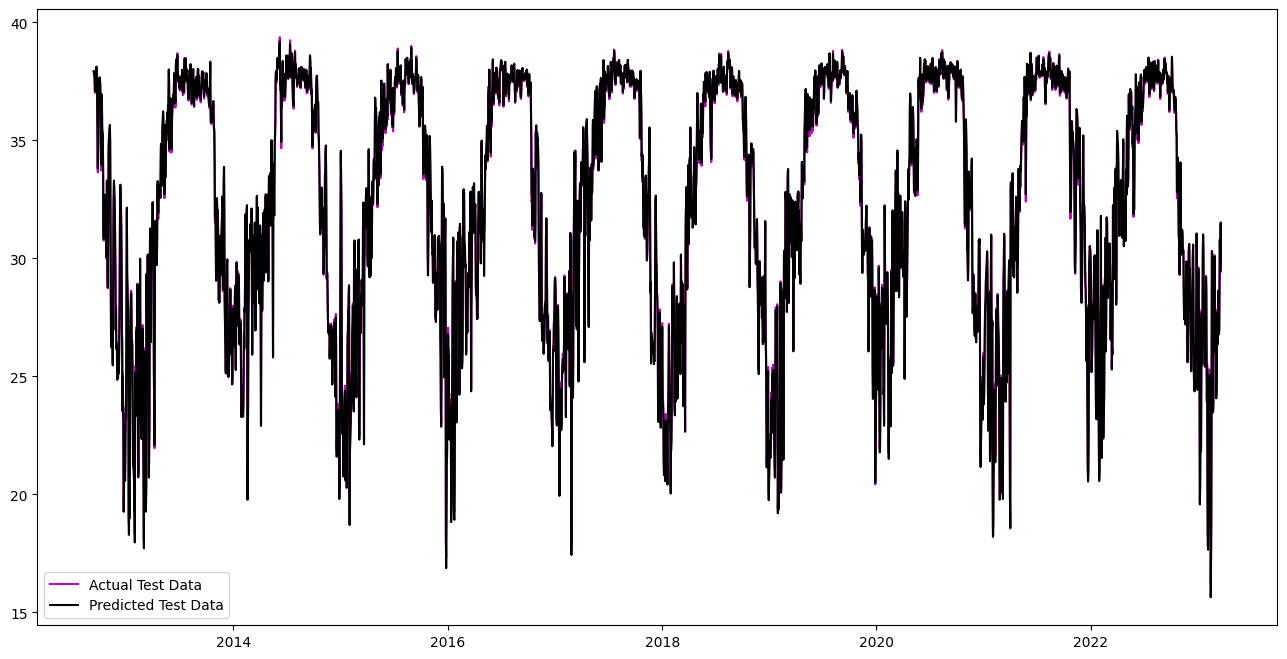

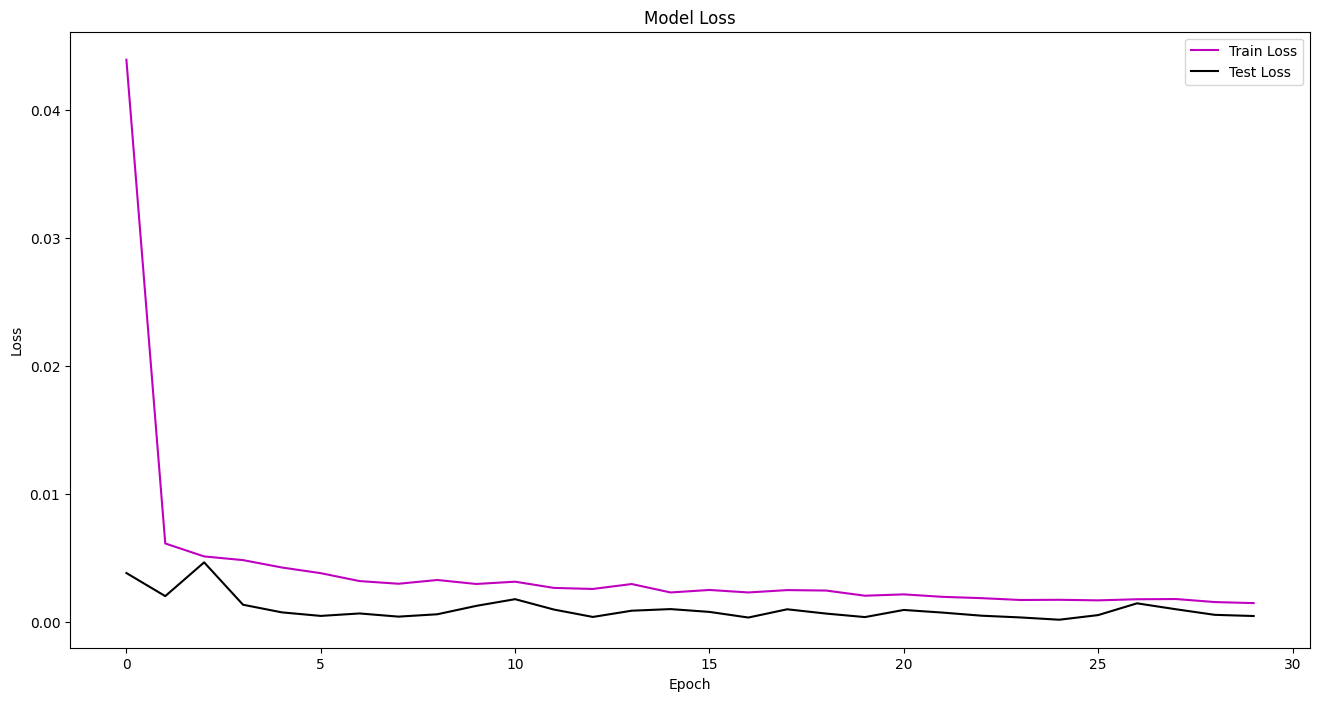

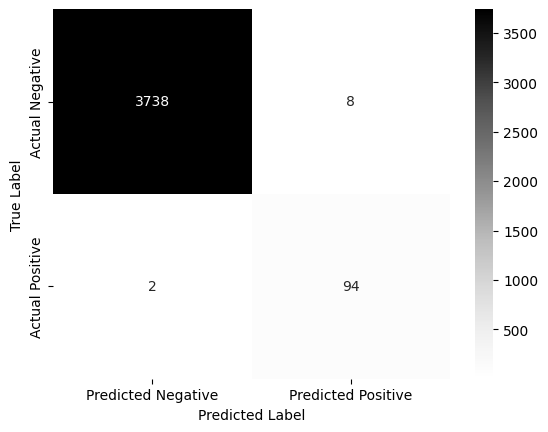

Occurred Heatwaves between 2012 & 2022 ->  96
Predicted Heatwaves between 2012 & 2022 ->  102
Heatwave Prediction accuracy: 99.74%


In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

from model import *
from data_utils import *
from visualization import *
from data_preprocessing import *
from heatwave_predict import *

# load and preprocess data
df = preprocess_data('../Dataset/Bhubaneswar.csv')

# scale data
scaler, scaled = scale_data(df)

# split data into train and test sets
train, test = split_train_test(scaled)

# prepare data for LSTM model
n_steps_in = 7
n_steps_out = 1
trainX, trainY = prepare_data(train, n_steps_in, n_steps_out)
testX, testY = prepare_data(test, n_steps_in, n_steps_out)

# define and fit the LSTM model
model = build_model(trainX, n_steps_in, n_steps_out)
history = model.fit(trainX, trainY, epochs=30, batch_size=32, validation_data=(testX, testY), verbose=2)

# make predictions and evaluate the model
rmseScore, maeScore, predictTemp, realTemp = evaluate_model(model, scaler, testX, testY)
rmseScore_, maeScore_, predictTemp_, realTemp_ = evaluate_model(model, scaler, trainX, trainY)
print('Train Score: %.2f RMSE' % (rmseScore))
print('Test Score: %.2f MAE' % (maeScore))

# plot the predicted and actual temperatures
date = df.tail(realTemp.shape[0]).index
plot_train_test_predictions(realTemp, predictTemp, date)
plot_loss(history)

# predict the heatwave
occurredHeatwave, predictedHeatwave, accuracy = predict_heatwave(predictTemp, realTemp, realTemp_, df)
print("Occurred Heatwaves between 2012 & 2022 -> ", occurredHeatwave)
print("Predicted Heatwaves between 2012 & 2022 -> ", predictedHeatwave)
print(f"Heatwave Prediction accuracy: {accuracy*100:.2f}%")